In [1]:
# import the necessary libraries 
from bs4 import BeautifulSoup
import requests
from collections import Counter
from string import punctuation
import operator
import time
import pickle
import re
import pandas as pd
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt

In [214]:
# test pipeline with happy playlist
song_data = pickle.load(open('song_data.p','rb'))

In [216]:
song_data.keys()

dict_keys(['4evmHXcjt3bTUHD1cvny97', '5s4useNfZqXHdXrRdDrzWc', '1HfMVBKM75vxSfsQ5VefZ5', '2wrJq5XKLnmhRXHIAf9xBa', '6mQLN3zRtAp6ovjusyYKrV', '5I8oEqbk2ZBmQfXCrZbUFb', '5WtfUKzXircvW8l5aaVZWT', '5rFj8OzffT0iggSjcBaeND', '22pBf2FVR5WYMcZ1ROSINP', '2jZIfoe48eUeOEnP9Ho4h2', '5g45gvxgaYVuhkDACPnvfh', '2hnxrRNzF74mdDzpQZQukQ', '6b2RcmUt1g9N9mQ3CbjX2Y', '3HVWdVOQ0ZA45FuZGSfvns', '7MmnLaftYzin7boRbplKdA', '6Yx181fZzA0YE2EkUsYruq', '7COXchtUOMd6uIT6HvmRaI', '4JWQC6gyYoPRnxRxk0ta2M', '4vUmTMuQqjdnvlZmAH61Qk', '6moU77g9RQyMzHNuKEaQKq', '1csB4kgdyglOQdH0EyFIqy', '3EPXxR3ImUwfayaurPi3cm', '6Qs4SXO9dwPj5GKvVOv8Ki', '5ug4vqGZ3eisGhY1IsziNX', '2ZrHbO88rM6Ijeg0aJmSzl', '018Idkvf82hi44UZmIXiGB', '5tAa8Uaqr4VvA3693mbIhU', '5FNS5Vj69AhRGJWjhrAd01', '2uaiyLKnYvazyfR0Ky3Kbk', '46D0hYb1B7qiU33VtXt21W', '2RttW7RAu5nOAfq6YFvApB', '4VPXFi4vFTtS9wHe6oMQaT', '7krbSH3rd8lhIZvuzTV3Bl', '0ND8rF8oirMXtE59n585P6', '0TK2YIli7K1leLovkQiNik', '4gJAWJnE5cvAAWyTMTxgdY', '4KnnWpUyPfQD6X5SQSTlH3', '72b0ANL1ZiV71OiZRs0Lny', '

In [217]:
song_data.values()

dict_values([{'artist': 'Ed Sheeran', 'name': 'Beautiful People (feat. Khalid)'}, {'artist': '5 Seconds of Summer', 'name': 'Lie To Me'}, {'artist': 'Selena Gomez', 'name': 'Lose You To Love Me'}, {'artist': 'Dan + Shay', 'name': '10,000 Hours (with Justin Bieber)'}, {'artist': 'James Arthur', 'name': 'Rewrite The Stars (with James Arthur & Anne-Marie)'}, {'artist': 'Shawn Mendes', 'name': "Fallin' All In You"}, {'artist': 'Julia Michaels', 'name': 'What A Time (feat. Niall Horan)'}, {'artist': 'Sam Smith', 'name': 'Fire On Fire - From "Watership Down"'}, {'artist': 'ZAYN', 'name': 'Good Years'}, {'artist': 'Jack & Jack', 'name': 'No One Compares To You'}, {'artist': 'James TW', 'name': 'You & Me'}, {'artist': 'Lauv', 'name': "There's No Way (feat. Julia Michaels)"}, {'artist': 'Sam Smith', 'name': 'How Do You Sleep?'}, {'artist': 'Ed Sheeran', 'name': "I Don't Care (with Justin Bieber)"}, {'artist': 'ZAYN', 'name': 'There You Are'}, {'artist': "Why Don't We", 'name': 'Big Plans'}, {'a

In [238]:
# playlist 1

#song_data = pickle.load(open('37i9dQZF1DXdPec7aLTmlC','rb'))

In [247]:
# playlist 2

#song_data = pickle.load(open('7ABD15iASBIpPP5uJ5awvq','rb'))

In [257]:
# playlist 3

song_data = pickle.load(open('1Ih75w3gT8Nw3uO4efQHsO','rb'))

In [258]:
# get URL for genius lyrics page for each song in a playlist
url_list = []
for key in list(song_data.keys()):
    song_d = song_data[key]
    current_artist = song_d['artist'].replace(" ","-")
    current_name = song_d['name'].replace(' ','-')
    url_list.append('https://genius.com/{}-{}-lyrics'.format(current_artist,current_name))

In [259]:
len(url_list)

100

In [ ]:
# will be used to get word counts in lyrics for each song in a playlist
# from https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-12.php
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [260]:
# get word counts in lyrics for each song in a playlist

#url_part1_clean2 = ['https://genius.com/Clara-mae-us-lyrics']
request_code = []
lyrics_freq2 = []
url_included = []
for i in url_list:
    time.sleep(2)
    r = requests.get(i)
    request_code = r.status_code
    if request_code == 200:
        url_included.append(i)
        soup = BeautifulSoup(r.content)
        breadcrum = soup.find('div', attrs={'class':'lyrics'}).get_text().strip()
        breadcrum2 = ''.join(breadcrum)
        text = breadcrum2.replace("\n"," ")
        #c = Counter((x.rstrip(punctuation).lower() for y in text for x in y.split()))
        c = word_count(re.sub(r'[^\w\s]','',str(text)).lower())
        lyrics_freq2.append(c)

In [261]:
len(lyrics_freq2)

51

In [262]:
len(url_included)

51

In [263]:
# paste uri here for given playlist
playlist_uri = '1Ih75w3gT8Nw3uO4efQHsO'

In [264]:
# construct data frame to store dictionary of word frequencies
data_1 = {'url_included': url_included, 'lyrics_frequency': lyrics_freq2, 'playlist_uri': playlist_uri}
data_1_df = pd.DataFrame(data_1)

In [265]:
data_1_df

,url_included,lyrics_frequency,playlist_uri
0,https://genius.com/Waka-Flocka-Flame-Hard-in-D...,"{'producer': 1, 'tag': 1, 'that': 3, 'nigga': ...",1Ih75w3gT8Nw3uO4efQHsO
1,https://genius.com/Chief-Keef-Love-Sosa-lyrics,"{'spoken': 1, 'intro': 1, 'jordan': 1, 'gilty'...",1Ih75w3gT8Nw3uO4efQHsO
2,https://genius.com/ScHoolboy-Q-Man-Of-The-Year...,"{'produced': 1, 'by': 2, 'nez': 1, 'rio': 1, '...",1Ih75w3gT8Nw3uO4efQHsO
3,https://genius.com/Bobby-Shmurda-Bobby-Bitch-l...,"{'produced': 1, 'by': 1, 'dondre': 1, 'intro':...",1Ih75w3gT8Nw3uO4efQHsO
4,https://genius.com/YG-My-Nigga-lyrics,"{'intro': 1, 'mustard': 1, 'on': 7, 'the': 16,...",1Ih75w3gT8Nw3uO4efQHsO
5,https://genius.com/6ix9ine-BILLY-lyrics,"{'intro': 1, 'shotti': 1, '6ix9ine': 4, 'thats...",1Ih75w3gT8Nw3uO4efQHsO
6,https://genius.com/6ix9ine-BUBA-lyrics,"{'intro': 1, 'scum': 1, 'gang': 2, 'mj': 1, 'p...",1Ih75w3gT8Nw3uO4efQHsO
7,https://genius.com/6ix9ine-TATI-lyrics,"{'intro': 1, 'hold': 2, 'up': 7, 'let': 2, 'me...",1Ih75w3gT8Nw3uO4efQHsO
8,https://genius.com/6ix9ine-KOODA-lyrics,"{'intro': 1, 'scum': 2, 'gang': 5, 'chorus': 3...",1Ih75w3gT8Nw3uO4efQHsO
9,https://genius.com/6ix9ine-KEKE-lyrics,"{'intro': 1, '6ix9ine': 4, 'scum': 1, 'gang': ...",1Ih75w3gT8Nw3uO4efQHsO


In [236]:
# not needed here
# dictonary to map genre/mood to playlist uri
uri_to_label = pickle.load(open('uri_to_label.p','rb'))

In [237]:
uri_to_label

{'spotify:playlist:37i9dQZF1DX50QitC6Oqtn': 0,
 'spotify:playlist:37i9dQZF1DX3tuWZaHjp5y': 0,
 'spotify:playlist:37i9dQZF1DX7rOY2tZUw1k': 0,
 'spotify:playlist:37i9dQZF1DX8WMG8VPSOJC': 0,
 'spotify:playlist:5KbTzqKBqxQRD8OBtJTZrS': 0,
 'spotify:playlist:7ABD15iASBIpPP5uJ5awvq': 1,
 'spotify:playlist:37i9dQZF1DWX83CujKHHOn': 1,
 'spotify:playlist:37i9dQZF1DX7qK8ma5wgG1': 1,
 'spotify:playlist:37i9dQZF1DX15JKV0q7shD': 1,
 'spotify:playlist:37i9dQZF1DWVV27DiNWxkR': 1,
 'spotify:playlist:37i9dQZF1DX38EeD6pDm10': 1,
 'spotify:playlist:5s7Sp5OZsw981I2OkQmyrz': 2,
 'spotify:playlist:71Xpaq3Hbpxz6w9yDmIsaH': 2,
 'spotify:playlist:793VjqKUs54BG9h1NB4xVZ': 2,
 'spotify:playlist:4mCGD3C9QXhrWv3uBIpbRF': 2,
 'spotify:playlist:6eKzH5I9hhEiL6mP47HJlw': 2,
 'spotify:playlist:3FgKMEAMkBOscuTQTNJiTN': 2,
 'spotify:playlist:37i9dQZF1DXdPec7aLTmlC': 3,
 'spotify:playlist:37i9dQZF1DWYBO1MoTDhZI': 3,
 'spotify:playlist:37i9dQZF1DWSkMjlBZAZ07': 3,
 'spotify:playlist:37i9dQZF1DX7KNKjOK0o75': 3,
 'spotify:pla

In [2]:
data_1Ih75w3gT8Nw3uO4efQHsO_df = pickle.load(open('data_1Ih75w3gT8Nw3uO4efQHsO_df.p','rb'))



In [18]:
all_means_1 = []
for i in data_1Ih75w3gT8Nw3uO4efQHsO_df['lyrics_frequency']:
    all_means_1.append(mean(i[k] for k in i))

In [19]:
len(all_means_1)

51

In [3]:
data_7ABD15iASBIpPP5uJ5awvq_df = pickle.load(open('data_7ABD15iASBIpPP5uJ5awvq_df.p','rb'))



In [21]:
all_means_2 = []
for i in data_7ABD15iASBIpPP5uJ5awvq_df['lyrics_frequency']:
    all_means_2.append(mean(i[k] for k in i))

In [4]:
data_37i9dQZF1DXdPec7aLTmlC_df = pickle.load(open('data_37i9dQZF1DXdPec7aLTmlC_df.p','rb'))


In [22]:
all_means_3 = []
for i in data_37i9dQZF1DXdPec7aLTmlC_df['lyrics_frequency']:
    all_means_3.append(mean(i[k] for k in i))

In [23]:
#df_means = {'all_means_1': all_means_1, 'all_means_2': all_means_2, 'all_means_3': all_means_3}

In [27]:
#pd.DataFrame(df_means)

In [ ]:
plt.boxplot([n for v in dict1.values() for n in v])

In [28]:
indicator_words = ['love', 'heart', 'her', 'his', 'boy', 'girl', 'want', 'life', 'best', 'care', 'hope', 'only', 'forever', 'embrace', 'kiss', 'break', 'broken', 'fuck', 'miss', 'missing', 'heart', 'sad', 'cry', 'crying', 'rain', 'alone', 'wish', 'hate', 'lose', 'hate', 'kill', 'hit', 'angry', 'fight', 'fuck', 'fucking', 'fighting', 'hard', 'argh', 'god', 'dead', 'love', 'lovely', 'happy', 'sing', 'shout', 'joy', 'sun', 'sunny', 'day', 'good', 'dance', 'dancing', 'hold', 'party', 'lit', 'hype', 'bottles', 'never', 'cant', 'never', 'get', 'bump', 'me', 'cant', 'power', 'lift', 'dont', 'wont', 'need', 'myself', 'party', 'Bacardi', 'drunk', 'lit', 'club', 'dance', 'dancing', 'drinking', 'flashing', 'lights', 'DJ', 'hands', 'fight', 'nobody', 'shit', 'drunk', 'cars', 'car', 'shoot', 'cash', 'money', 'smoke', 'cool', 'hold', 'smile', 'air', 'breeze', 'chill', 'easy', 'morning', 'drift', 'float', 'floating', 'smoking', 'high', 'bed', 'sex', 'lips', 'arms', 'hair', 'body', 'mine', 'night', 'tonight', 'love', 'sweat', 'kiss', 'fuck', 'baby', 'down']


In [29]:
indicator_words_set = set(indicator_words)

In [32]:
len(indicator_words_set)

105

In [ ]:
for i in indicator_words_set:
    

In [ ]:
x= 
y=
stds= 
plt.ylabel("Word count per song")
plt.xlabel("Indicator word")
plt.title('Indicator word counts')
plt.plot(x, y, 'b-', marker='o',label = 'Cross Validation Performance')
plt.fill_between(x, y + 2*stds, y - 2*stds, alpha=0.2)
plt.legend()
plt.show()

In [45]:
# dictionary of word counts
data_pro_full = pickle.load(open('data_pro_full.p','rb'))

In [46]:
data_pro_full2 = data_pro_full.drop(columns='label')

In [47]:
data_pro_full2.describe()

,fight,forever,sunny,drift,shoot,car,down,high,lit,easy,...,dead,baby,sing,good,me,drunk,smoke,morning,her,lift
count,235.000000,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.102128,0.127660,0.004255,0.0,0.085106,0.110638,1.361702,0.268085,0.012766,0.174468,...,0.119149,0.757447,0.072340,0.634043,6.497872,0.076596,0.093617,0.093617,0.578723,0.034043
std,0.504463,0.599751,0.065233,0.0,0.393852,0.352787,3.876433,1.897041,0.112503,1.426020,...,0.729898,2.074648,0.496871,2.154827,8.303215,0.395602,0.546709,0.433335,2.163502,0.304718
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,6.000000,1.000000,0.0,4.000000,2.000000,47.000000,28.000000,1.000000,21.000000,...,10.000000,17.000000,6.000000,15.000000,55.000000,4.000000,6.000000,4.000000,25.000000,4.000000


Text(0, 0.5, 'Word count')

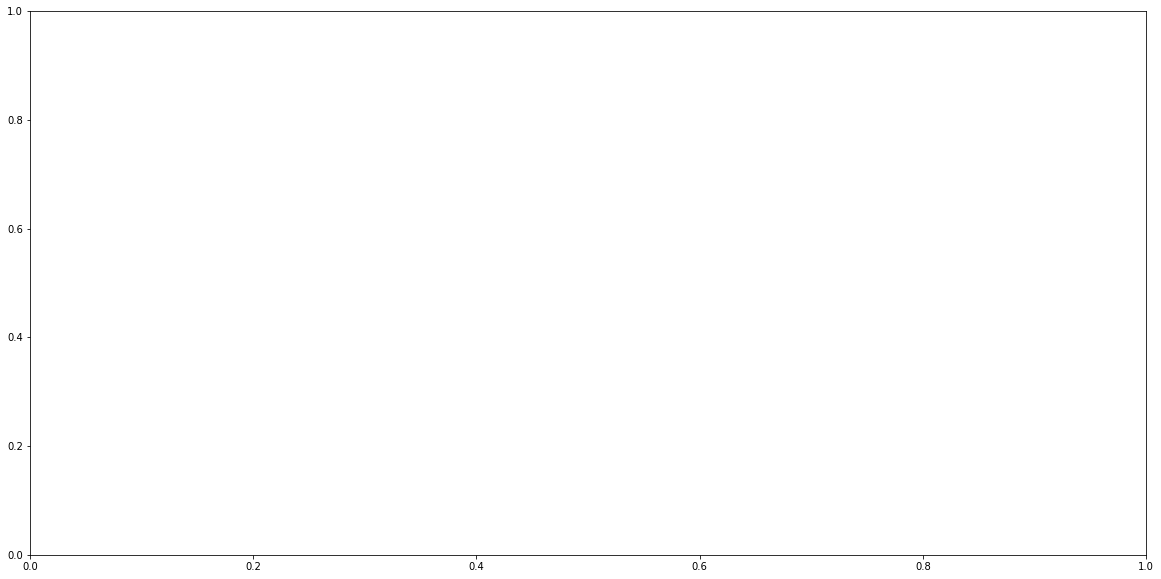

Error in callback <function flush_figures at 0x11c8c59e0> (for post_execute):


KeyboardInterrupt: 

In [19]:
#cv_df = cv_df.transpose()
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.bar(data_pro_full.columns)
ax.set_title('Word counts across all songs')
plt.xticks(rotation='vertical')
ax.set_xlabel("Indicator word")
ax.set_ylabel('Word count')

In [ ]:
data_pro_full.plot.bar(x='lab', y='val', rot=0)

In [33]:
data_pro_full2.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

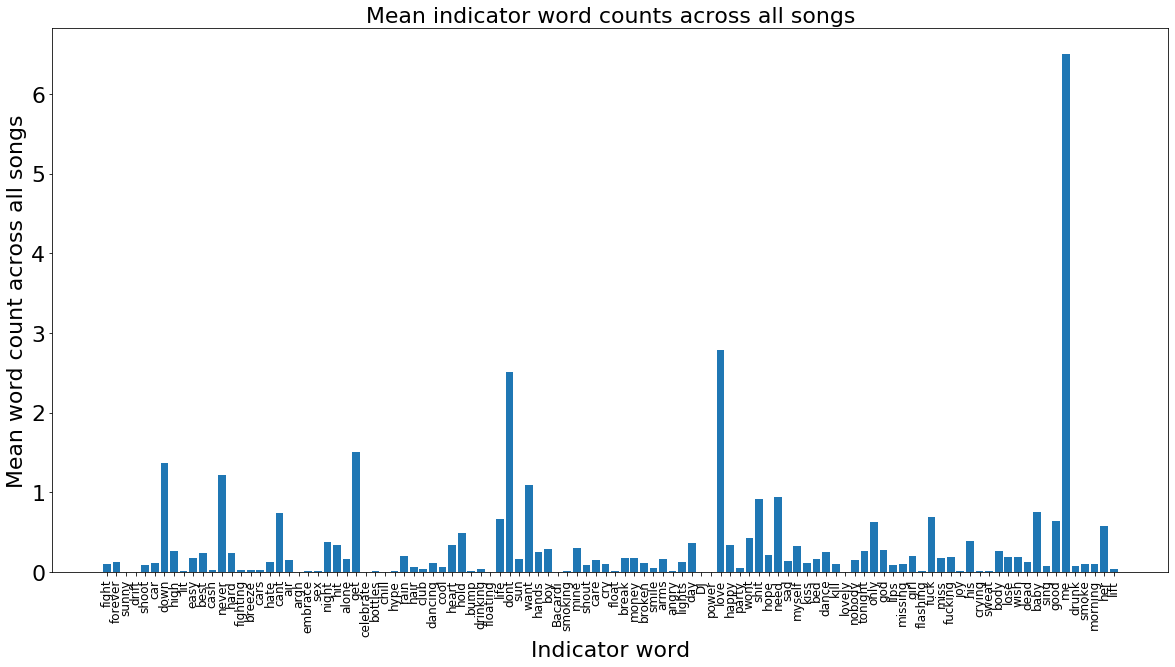

In [48]:
plt.subplots(figsize=(20, 10))
plt.bar(range(len(np.mean(data_pro_full2,axis=0))),np.mean(data_pro_full2,axis=0))
plt.xlabel('Indicator word', fontsize=22)
plt.xticks(range(len(np.mean(data_pro_full2,axis=0))),data_pro_full2.columns, rotation='vertical',fontsize=12)
plt.ylabel('Mean word count across all songs')
plt.title('Mean indicator word counts across all songs',fontsize=22)
plt.savefig('word_freq')